In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Latifa_saidi ML/Copie de pima-data.csv")
df.shape

(768, 10)

In [ ]:
df.head() #first 5 lines

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [ ]:
df.tail() #last 5 lines

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [ ]:
df.info(verbose=True) #all informations about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [ ]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.0000
glucose_conc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.0000
diastolic_bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.0000
thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.0000
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.0000
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.1000
diab_pred,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.4200
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.0000
skin,768.0,0.809136,0.628517,0.000,0.00000,0.9062,1.26080,3.9006


In [ ]:
def plot_corr(df, size=11):
    corr = df.corr() # calling the correlation function on the datafrmae
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)),corr.columns) # draw x tickmarks
    plt.yticks(range(len(corr.columns)),corr.columns) # draw y tickmarks



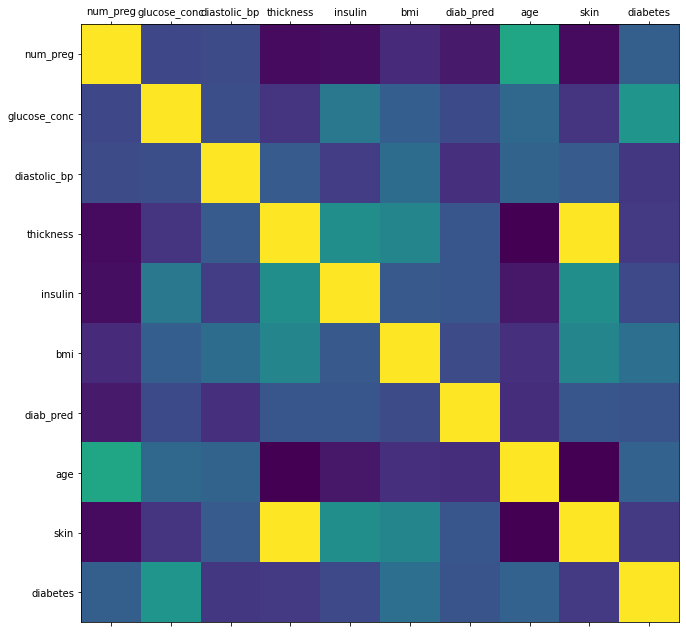

In [ ]:
plot_corr(df)

In [ ]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [ ]:
del df['skin']

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [ ]:
diabets_map={True:1, False:0}
df['diabetes']=df['diabetes'].map(diabetes_map)

In [ ]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#count hidden missing values in each columns

print("# number of rows in dataframe {0}".format(len(df)))
print("# number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# number of rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# number of rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# number of rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# number of rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# number of rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# number of rows missing age: {0}".format(len(df.loc[df['age'] == 0])))


# number of rows in dataframe 768
# number of rows missing glucose_conc: 5
# number of rows missing diastolic_bp: 35
# number of rows missing thickness: 227
# number of rows missing insulin: 374
# number of rows missing bmi: 11
# number of rows missing diab_pred: 0
# number of rows missing age: 0
# number of personnes have not diabete: 500


In [ ]:
#number of diabetes personnes
print("# number of personnes have  diabete: {0}".format(len(df.loc[df['diabetes']==1])) )

# number of personnes have  diabete: 268


In [ ]:
#number of diabetes positif and no diabetes cases
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


In [ ]:
#split_data

from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values # these are factors for the prediction
y = df[predicted_class_names].values # this is what we want to predict

split_test_size = 0.3

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = split_test_size,random_state=0)
# 42 is the set.seed() equivalent in Python which generates repeatable random distribution

In [ ]:
#check the split

print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


In [ ]:
#check the values distribution  across the training and testing data


print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))